In [ ]:
!pip install pandas

In [ ]:
!pip install yfinance

In [ ]:
!pip install pandas-datareader

In [368]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf

def get_historical_Data(tickers):
    """This function returns a pd dataframe with all of the adjusted closing information"""
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i, start=datetime(2022, 1, 1), end=datetime(2024, 6, 1)).iloc[:,4])], axis = 1)
        names.append(i)
    data.columns = names
    return data
### I chose data starting from the beginning of 2022 because that is when Monster first started doing things with alchohol (they acquired an alc. company)
### I did that because I wanted to compare Monster to a wider variety of drink companies

ticks = ["MNST", "CELH", "KO", "PEP", "KDP", "STZ", "BUD", "TAP", "SBUX", "DEO"]
d = get_historical_Data(ticks)
print(d.shape)
# Most Recent Data
d.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

(606, 10)


,MNST,CELH,KO,PEP,KDP,STZ,BUD,TAP,SBUX,DEO
Date,,,,,,,,,,
2024-05-24,52.700001,95.150002,62.000000,177.990005,34.189999,248.509995,65.040001,53.500000,78.870003,136.809998
2024-05-28,51.650002,82.919998,61.820000,173.380005,33.709999,245.490005,63.509998,52.959999,77.480003,134.029999
2024-05-29,52.130001,79.809998,61.700001,171.149994,33.660000,243.970001,62.279999,53.020000,76.879997,131.440002
2024-05-30,51.240002,78.699997,61.970001,170.479996,33.900002,246.589996,62.330002,53.220001,78.760002,132.330002
2024-05-31,51.919998,79.980003,62.930000,172.899994,34.250000,250.229996,63.070000,54.810001,80.220001,135.089996


In [370]:
corr_matrix = d.corr()
corr_matrix
### As you can see Monster has a pretty strong price correlation to TAP. Since the price correlation is >0.8, it's worth looking at.

,MNST,CELH,KO,PEP,KDP,STZ,BUD,TAP,SBUX,DEO
MNST,1.000000,0.747608,0.301997,0.704483,-0.712000,0.520412,0.430252,0.834386,0.578517,-0.571641
CELH,0.747608,1.000000,0.209560,0.397323,-0.658357,0.679186,0.317005,0.756949,0.160288,-0.781850
KO,0.301997,0.209560,1.000000,0.560588,0.089395,0.343295,0.466892,0.282061,-0.032539,0.078110
PEP,0.704483,0.397323,0.560588,1.000000,-0.189078,0.377081,0.311589,0.517626,0.513500,-0.102436
KDP,-0.712000,-0.658357,0.089395,-0.189078,1.000000,-0.332756,-0.284160,-0.760963,-0.303078,0.622796
STZ,0.520412,0.679186,0.343295,0.377081,-0.332756,1.000000,0.089270,0.691453,-0.083425,-0.411662
BUD,0.430252,0.317005,0.466892,0.311589,-0.284160,0.089270,1.000000,0.309800,0.419366,-0.115882
TAP,0.834386,0.756949,0.282061,0.517626,-0.760963,0.691453,0.309800,1.000000,0.274024,-0.577504
SBUX,0.578517,0.160288,-0.032539,0.513500,-0.303078,-0.083425,0.419366,0.274024,1.000000,-0.009764
DEO,-0.571641,-0.781850,0.078110,-0.102436,0.622796,-0.411662,-0.115882,-0.577504,-0.009764,1.000000


<Axes: >

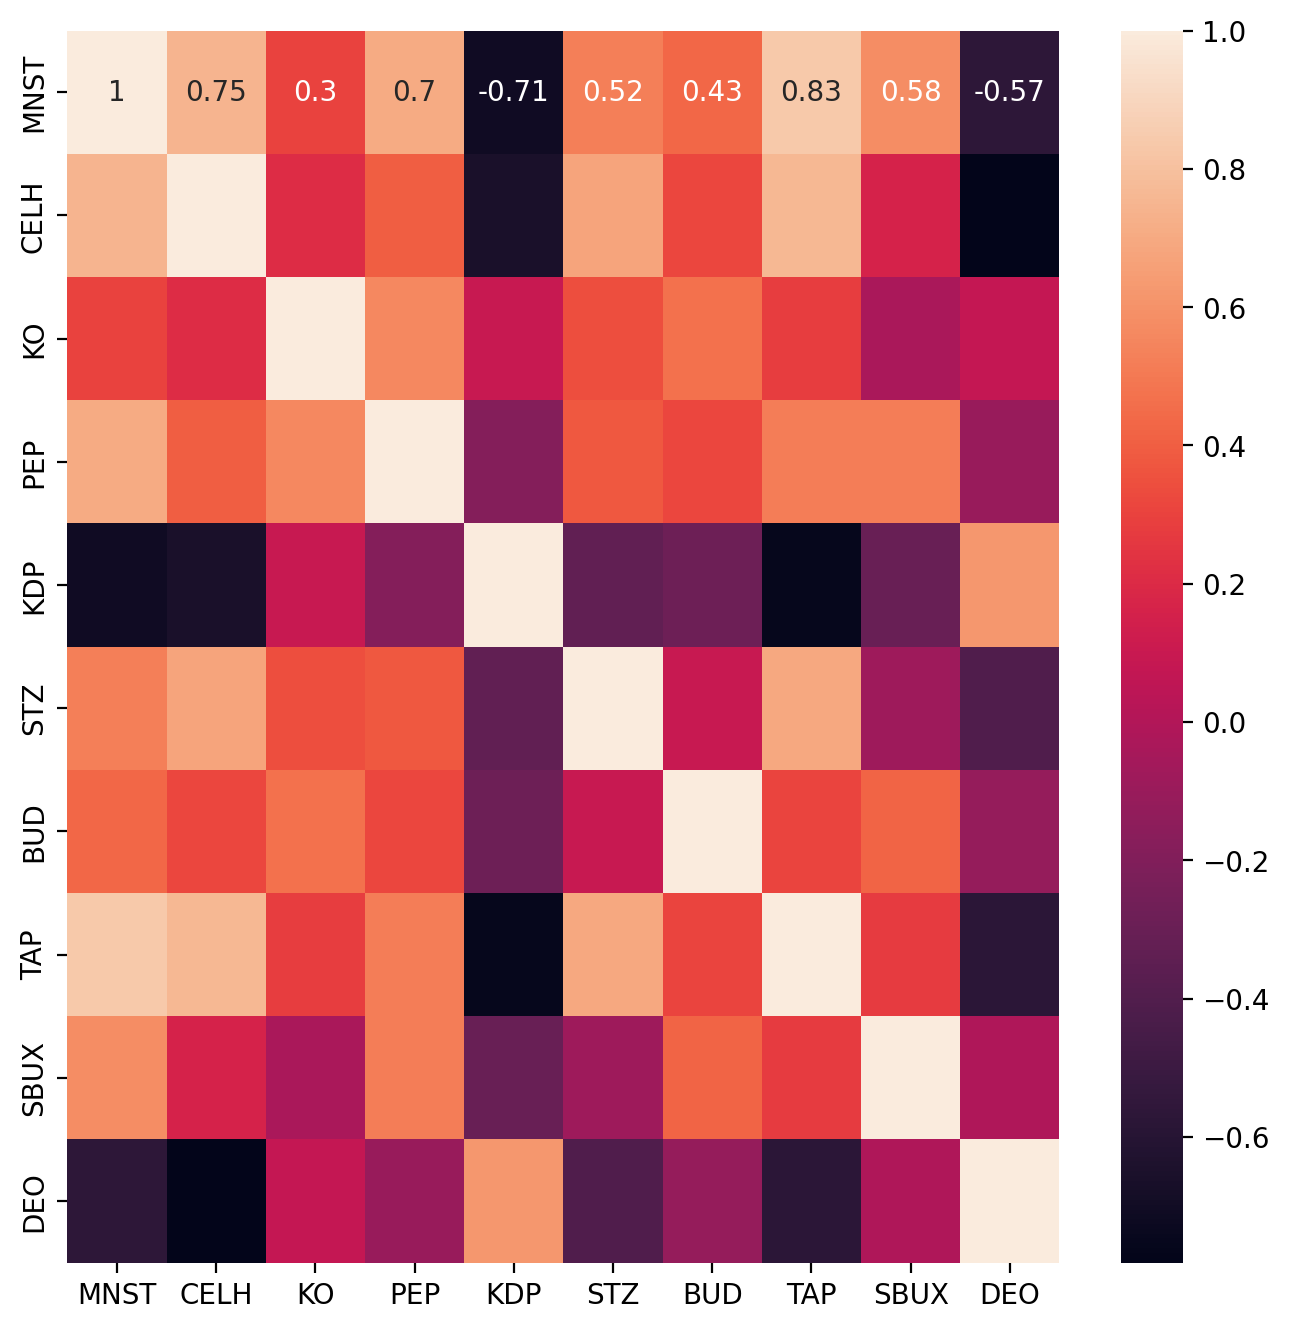

In [372]:
import seaborn as sn
from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=200)
sn.heatmap(corr_matrix, annot = True)

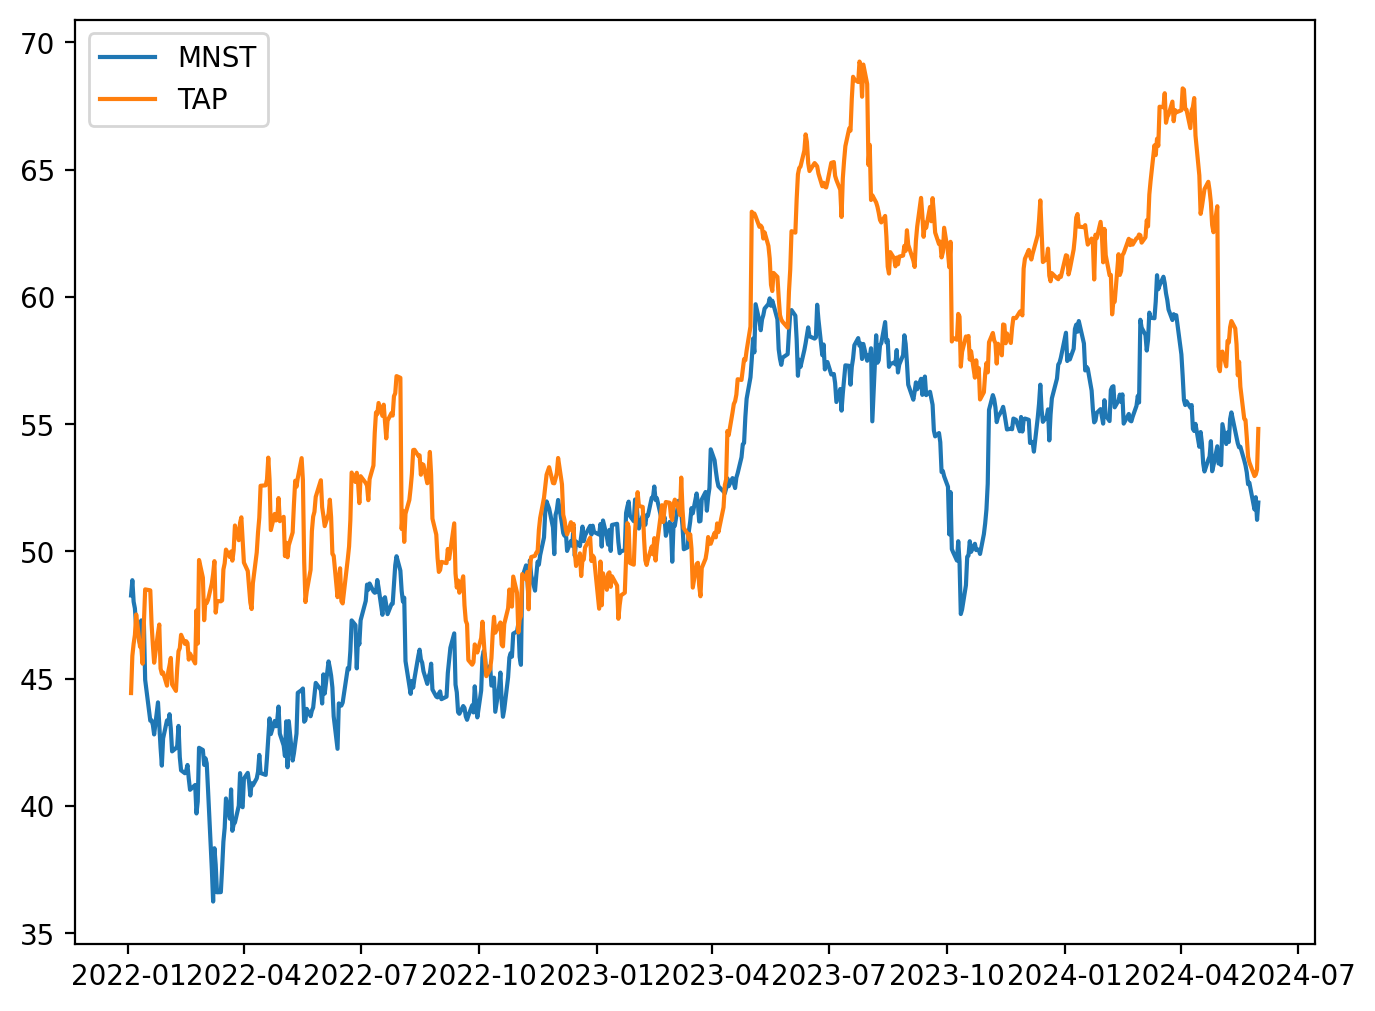

In [374]:
import matplotlib.pyplot as plt
figure(figsize=(8, 6), dpi=200)
MNST = d['MNST'] # MNST
TAP = d['TAP'] # TAP
plt.plot(MNST, label = "MNST")
plt.plot(TAP, label = "TAP")
plt.legend()

Text(0.5, 1.0, 'Spread between MNST and TAP')

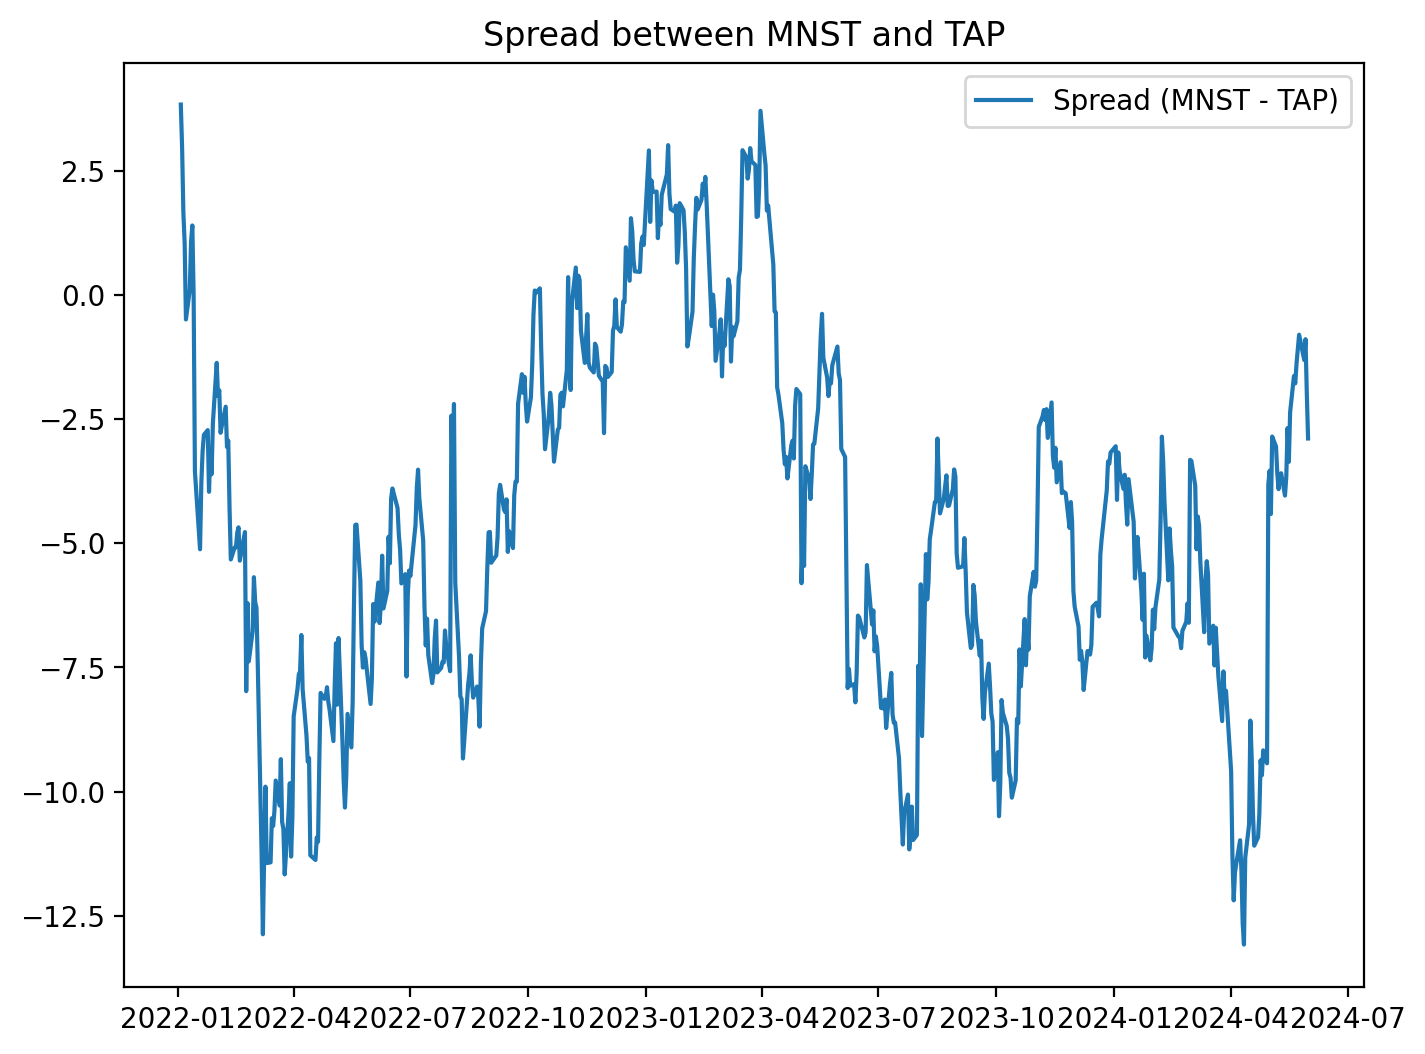

In [376]:
# plot the spread
figure(figsize=(8, 6), dpi=200)
plt.plot(MNST - TAP, label = 'Spread (MNST - TAP)')
plt.legend()
plt.title("Spread between MNST and TAP")

In [378]:
import statsmodels.tsa.stattools as ts 
result = ts.coint(MNST, TAP)

In [380]:
cointegration_t_statistic = result[0]
p_val = result[1]
critical_values_test_statistic_at_1_5_10 = result[2]
print('We want the P val < 0.05 because that means cointegration exists')
### Though the p value is greater than 0.5, it is still somewhat close and the spread is still stationary enough to model the relationship
print('P value for the augmented Engle-Granger two-step cointegration test is', p_val)

We want the P val < 0.05 because that means cointegration exists
P value for the augmented Engle-Granger two-step cointegration test is 0.08342959425672952


Text(0.5, 1.0, 'Price Ratio between MNST and TAP')

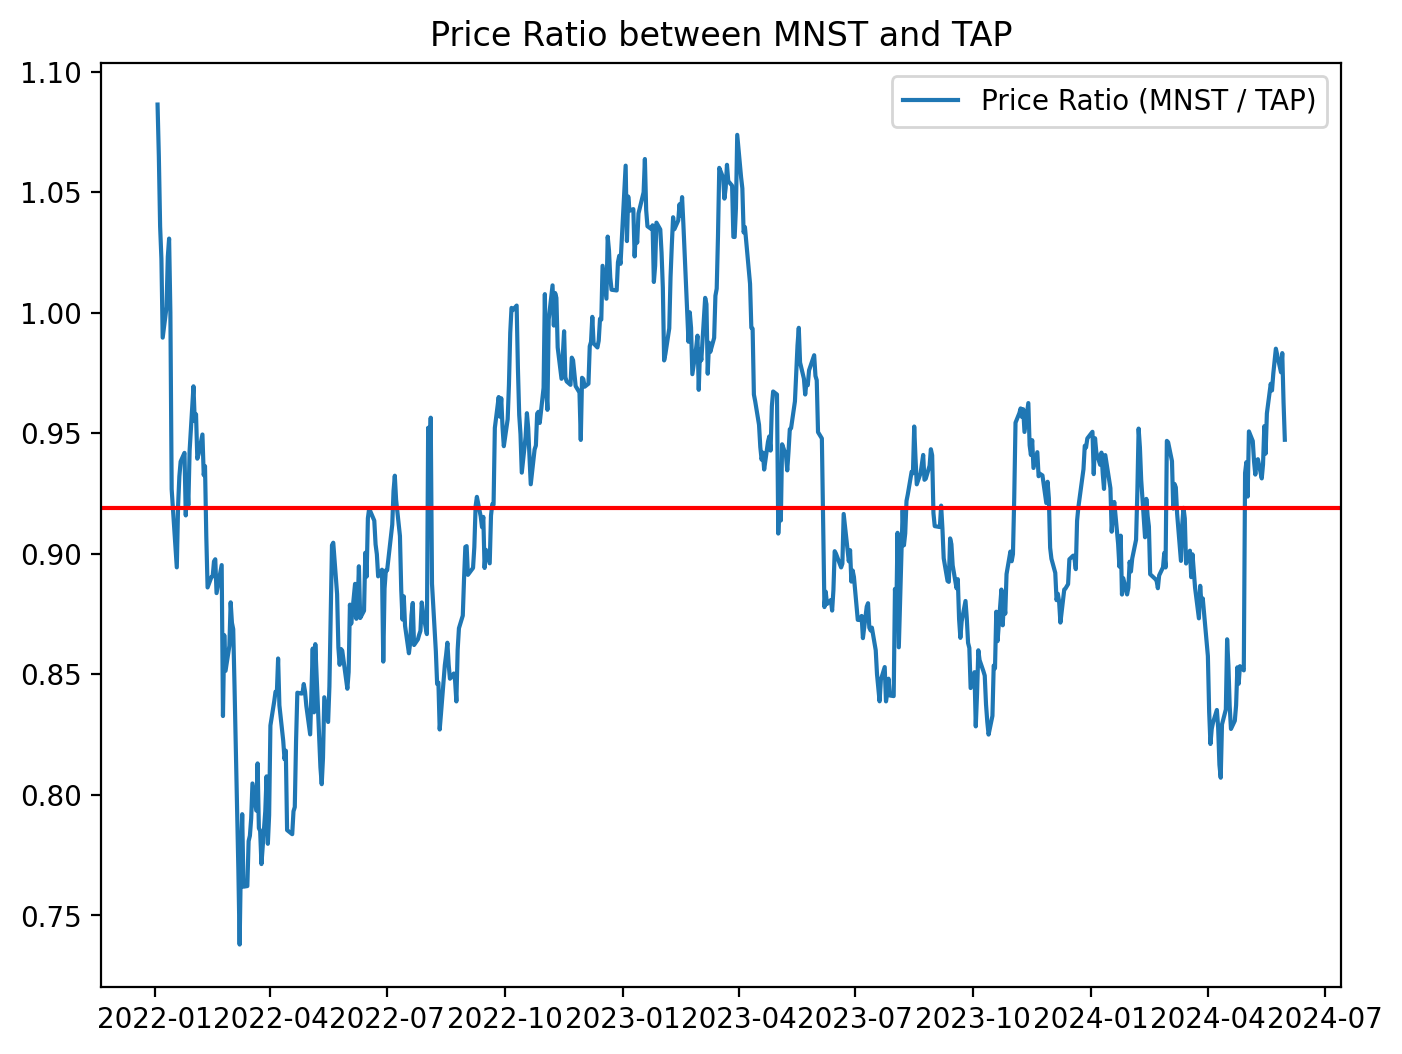

In [382]:
figure(figsize=(8, 6), dpi=200)
ratio = MNST / TAP
plt.plot(ratio, label = 'Price Ratio (MNST / TAP)')
plt.axhline(ratio.mean(), color='red')
plt.legend()
plt.title("Price Ratio between MNST and TAP")

In [384]:
from statsmodels.tsa.stattools import adfuller
MNST_ADF = adfuller(MNST)
print('P value for the MNST ADF Test is', MNST_ADF[1])
TAP_ADF = adfuller(TAP)
print('P value for the TAP ADF Test is', TAP_ADF[1])
Spread_ADF = adfuller(MNST - TAP)
print('P value for the MNST - TAP Spread ADF Test is', Spread_ADF[1])
Ratio_ADF = adfuller(MNST / TAP)
print('P value for the MNST / TAP Price Ratio ADF is', Ratio_ADF[1])
### This shows that individually neither stock is stationary, but their combined spread and price ratio are.
### It's apparent when you look the above three graphs, as you can easily draw a mean for the spread and price ratio graph, but it would be hard to draw one for the individual stocks

P value for the MNST ADF Test is 0.5579883450417635
P value for the TAP ADF Test is 0.25838269728755137
P value for the MNST - TAP Spread ADF Test is 0.010796751001067539
P value for the MNST / TAP Price Ratio ADF is 0.009625605436814847


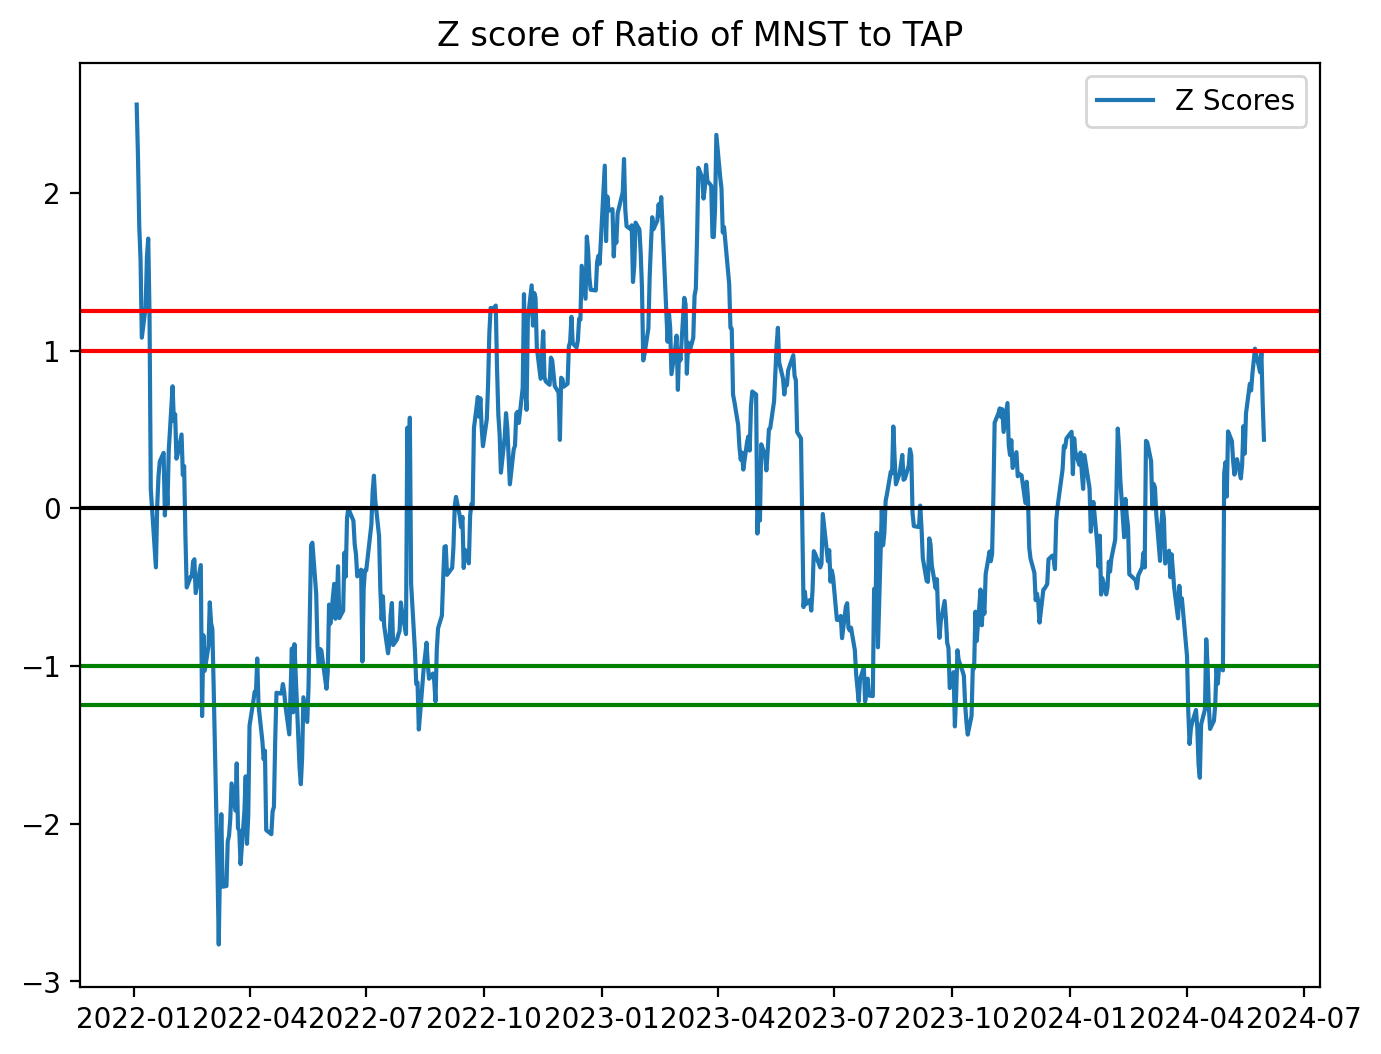

In [386]:
figure(figsize=(8, 6), dpi=200)
# Calculates the Zscores of each row.
df_zscore = (ratio - ratio.mean())/ratio.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') 
plt.axhline(1.25, color='red') # 95% of the data will lie here
plt.axhline(-1.0, color='green') # 68% of the data will lie here
plt.axhline(-1.25, color='green') # 95% of the data will lie here
plt.legend(loc = 'best')
plt.title('Z score of Ratio of MNST to TAP')
plt.show()
### This is helpful because if a point is outside of these bands, then you know that it has to converge to the mean.
### If you can determine when it converges, you can determine when to long or short MNST to TAP

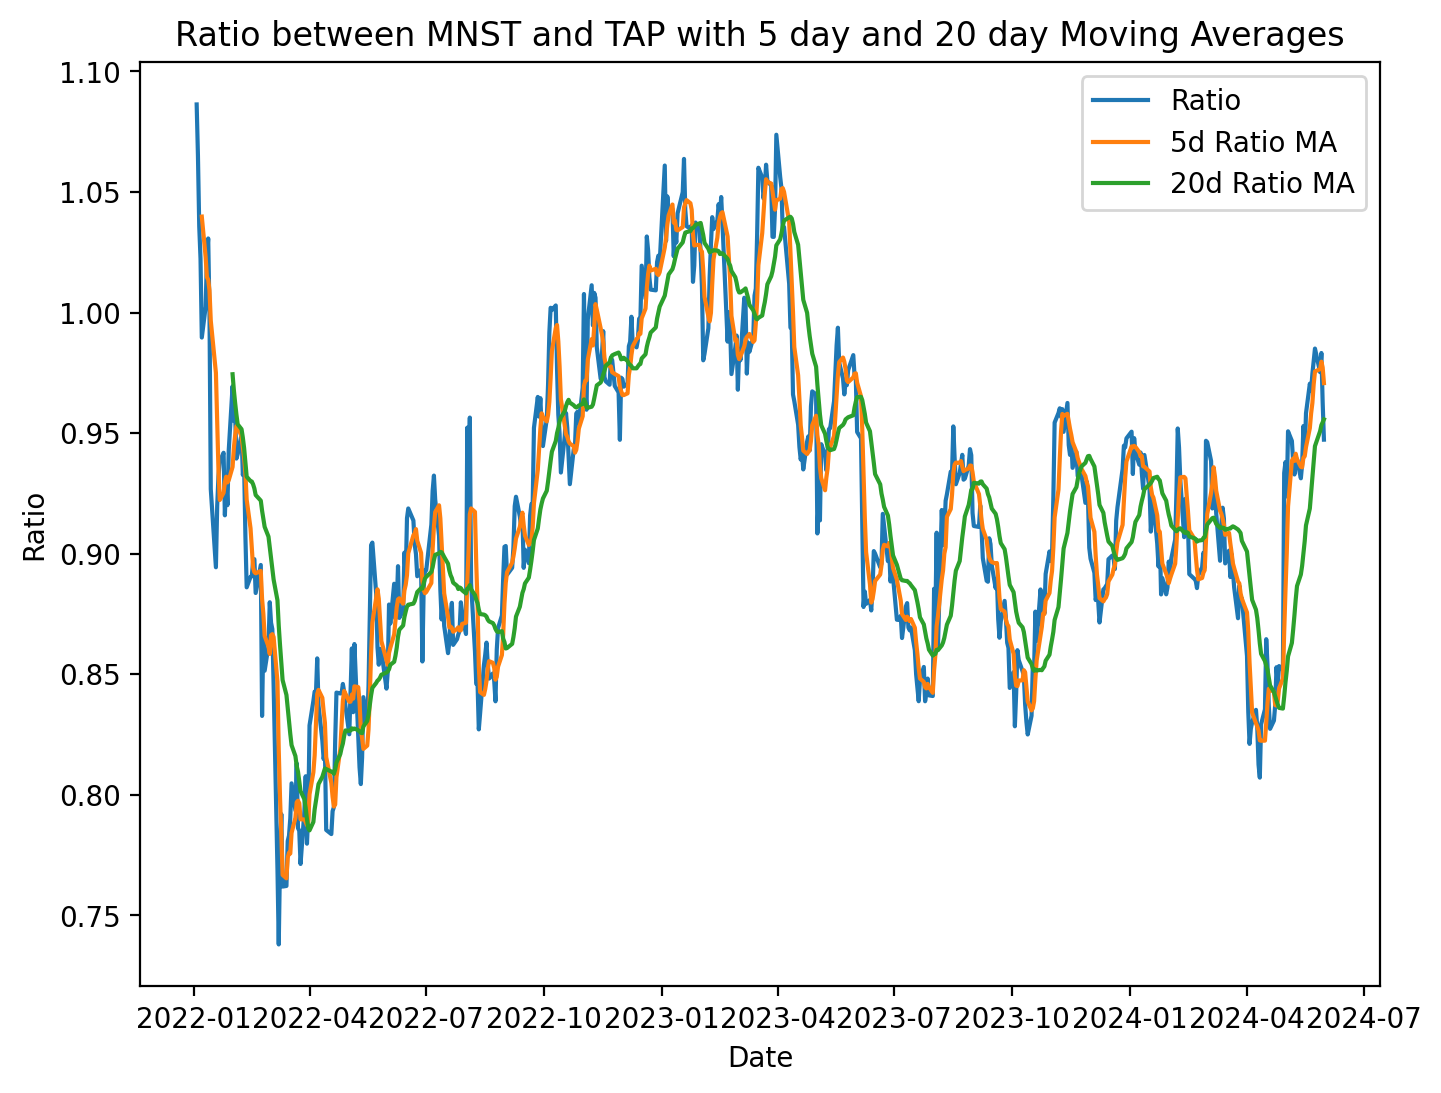

In [388]:
figure(figsize=(8, 6), dpi=200)
ratios_mavg5 = ratio.rolling(window=5, center=False).mean()
ratios_mavg20 = ratio.rolling(window=20, center=False).mean()
std_20 = ratio.rolling(window=20, center=False).std()
zscore_20_5 = (ratios_mavg5 - ratios_mavg20)/std_20
plt.plot(ratio.index, ratio.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg20.index, ratios_mavg20.values)
plt.legend(['Ratio', '5d Ratio MA', '20d Ratio MA'])
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.title('Ratio between MNST and TAP with 5 day and 20 day Moving Averages')
plt.show()

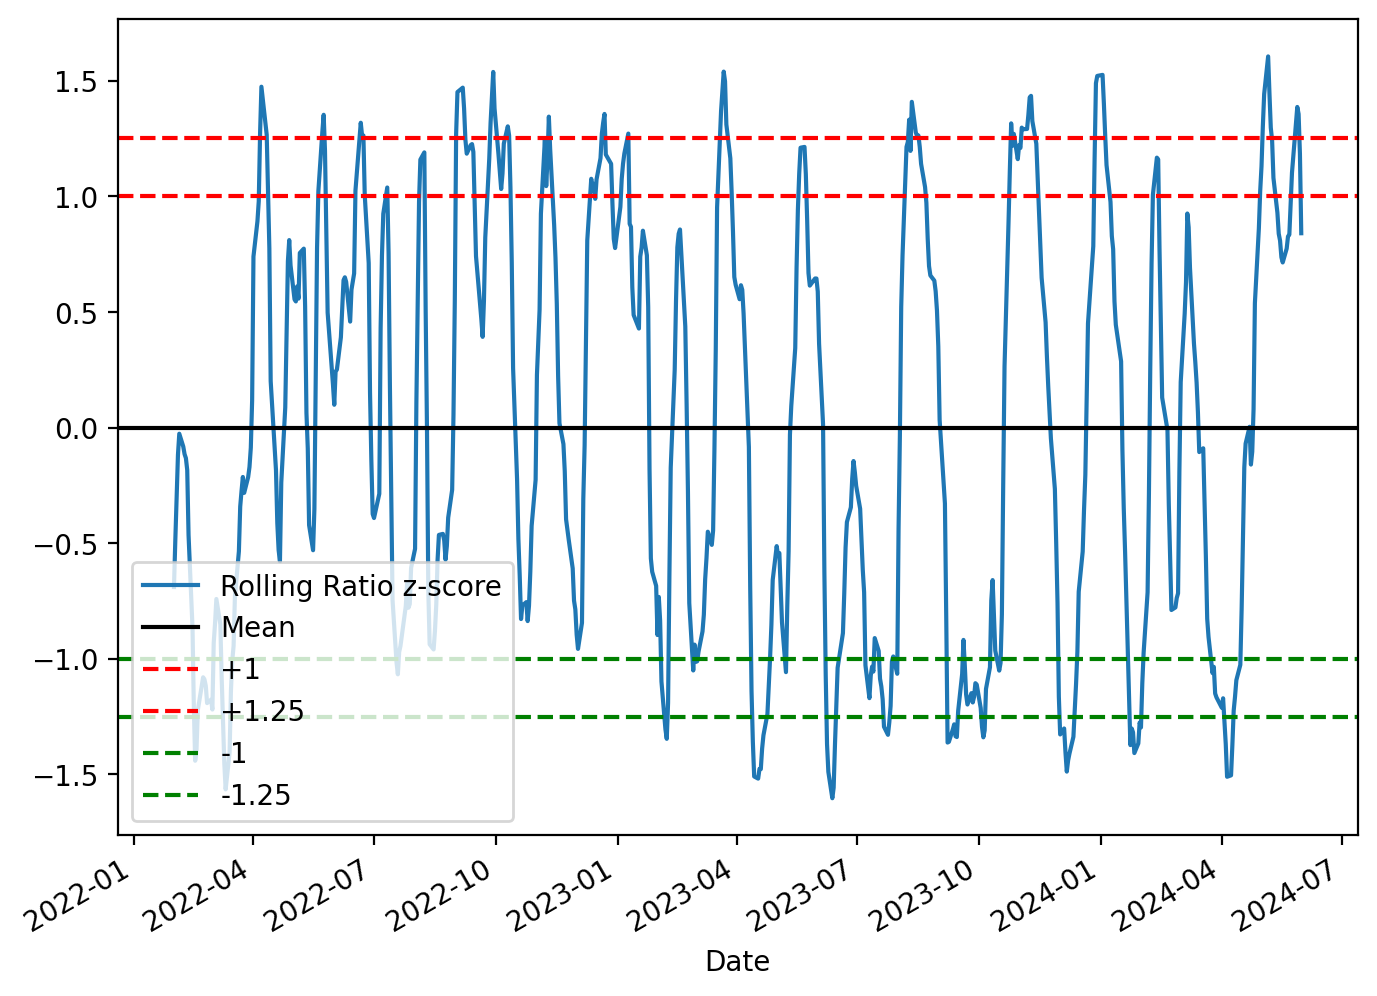

In [390]:
figure(figsize=(8, 6), dpi=200)
zscore_20_5.plot()
plt.axhline(0, color='black')
plt.axhline(1, color='red', linestyle='--')
plt.axhline(1.25, color='red', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(-1.25, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-score', 'Mean', '+1','+1.25','-1','-1.25'])
plt.show()

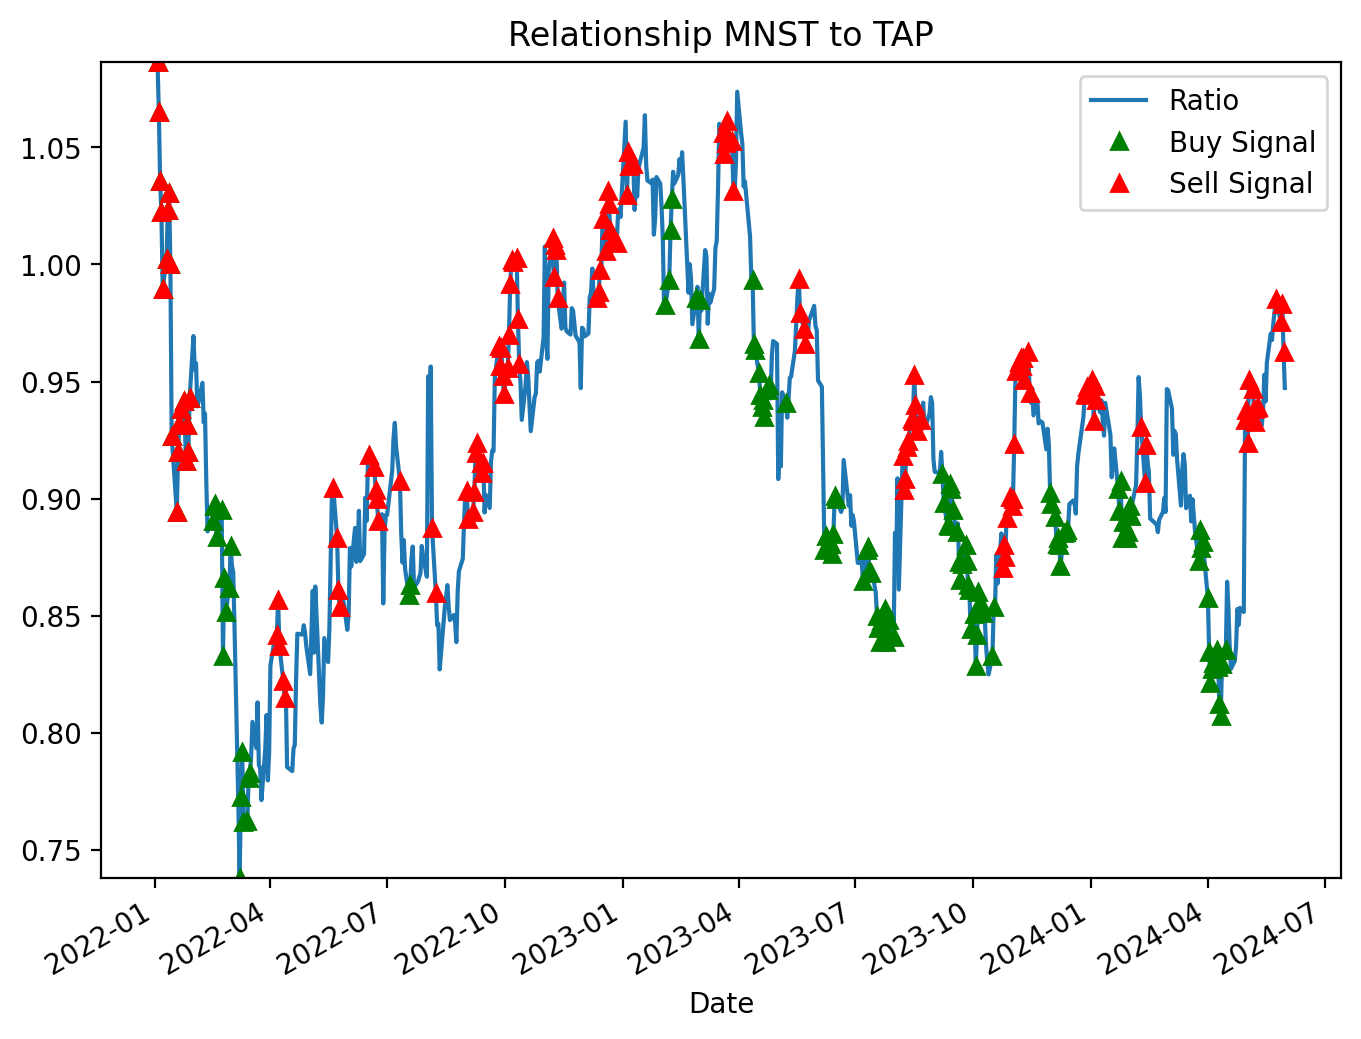

In [392]:
figure(figsize=(8, 6), dpi=200)
ratio.plot()
buy = ratio.copy()
sell = ratio.copy()
buy[zscore_20_5>-1] = 0
sell[zscore_20_5<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship MNST to TAP')
plt.show()
### Given the Sell Signal, it would be advisable to short MNST and long TAP (if you wanted to pair trade)